# Supervised Modelling

---
### <i>Changelogs:</i>

  Name  |  Date  |   Description
- **Kiet Vu**   |  03/23  | File Created.
- **Kiet Vu**  |  04/21  | Testing and modeling by Decision Trees Regression
- **Kiet Vu**  |  04/23  | Remodelling Decision Trees Regression since many columns are unimportant/ continous data
- **Nicole Nguyen**  |  04/23  | Testing and adding Naive Bayes
- **Kiet Vu**  |  04/27  | Setting Independent and Dependent variable to standardize the modellings
- **Bao Tran**  |  04/27  | Adding Knn
- **Kiet Vu**  |  04/29  | Testing with specific indenpentdent attributes based on MCA (see Unsupervised Learning)

---

- **[Setting Independent and Dependent Variables for Training](#Variables)**
<br>
- **[Multi-Linear Regression](#MultiLinearRegression)**:
This is a popular statistical method used for binary classification problems. You can use logistic regression to predict the target variable based on the categorical attributes.
        Columns chosen:
<br>

- **[Decision Trees](#DecisionTrees)**:
Decision trees are a popular algorithm for classification problems, especially when the data has categorical attributes. Decision trees can be used to split the data based on the categories of the attributes, and make a prediction based on the majority class at each leaf node.
        
        Columns chosen:
'unique_identifier','usage','status',
"B2B_EMPLOYEE_SIZE",
"B2B_BUSINESS_SQUARE_FOOT_NUM",
"B2B_BIG_BUSINESS_INDICATOR",
"B2B_SMALL_SIZE_FLAG",
"B2B_MEDIUM_SIZE_FLAG",
"B2B_HIGH_TECH_FLAG",
"B2B_TELECOMMUNICATIONS_CODE",
"B2B_UTILITY_CODE",
"B2B_COMPUTER_EXPENSE_CODE",
"B2B_PURCHASE_PRINT_EXPENSE_CODE",
"CAC_SEGMENT",
"B2B_WHITE_COLLAR_PRCNT"

<br>

- **[Random Forests](#RandomForests)**: 
Random forests are an ensemble method that combines multiple decision trees to improve the accuracy of the predictions. Random forests are especially useful for high-dimensional datasets with a large number of categorical attributes.
        Columns chosen:
<br>

- **[Naive Bayes](#NaiveBayers)**: 
Naive Bayes is a simple probabilistic algorithm used for classification tasks. It assumes that the attributes are conditionally independent given the target variable, and uses Bayes' theorem to calculate the probability of each class given the attributes.
        Columns chosen:
<br>

- **[K-Nearest Neighbor (K-NN)](KNN)**: 
K-NN is a non-parametric algorithm that can be used for classification tasks. It works by finding the K nearest neighbors of a new data point based on the categorical attributes, and assigning a class label based on the majority class of the neighbors.
        Columns chosen:
        
---

## Import libraries and raw data

In [ ]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

In [ ]:
data = pd.read_csv("Clean Data/prep_dataset_20230429.csv", low_memory=False)
df = data.copy()
df.head(30)

---
## Setting Independent and Dependent Variables for Training <a class="anchor" id="Variables"></a>
### I did this so you don't have to!

If you want to modify you training data, just do:

    for dropping
`X_[your model name here] = df.drop(['column name',...], axis=1)`

    for adding
`X_[your model name here] = df[['column name','column name',...]]`

<br>

**Note:** "X" varible is the unversal name to run all models, modify the train data in your own part and set it as `X_[your model name` if you want to change the independent variables for training the data

- **Column to take:**
`"unique_identifier",
"B2B_ADDR_STATE",
"B2B_ACCOUNTING_EXPENSE_CODE",
"B2B_ADVERTISING_EXPENSE_CODE",
"B2B_BIG_BUSINESS_INDICATOR",
"B2B_BUSINESS_SQUARE_FOOT_NUM",
"B2B_COMPUTER_EXPENSE_CODE",
"B2B_CONTRACT_LABOR_EXPENSE_CODE",
"B2B_CREDIT_GRADE",
"B2B_EMPLOYEE_SIZE",
"B2B_EXPENSE_TYPE",
"B2B_HIGH_TECH_FLAG",
"B2B_INSURANCE_EXPENSE_CODE",
"B2B_LEGAL_EXPENSE_CODE",
"B2B_MEDIUM_SIZE_FLAG",
"B2B_MULTI_TENANT_DESCRIP",
"B2B_PAYROLL_EXPENSE_CODE",
"B2B_PURCHASE_ADMIN_EXPENSE_CODE",
"B2B_PURCHASE_PRINT_EXPENSE_CODE",
"B2B_REST_LEASE_EXPENSE_CODE",
"B2B_SALES_VOLUME",
"B2B_SMALL_SIZE_FLAG",
"B2B_TELECOMMUNICATIONS_CODE",
"B2B_TENANT_FLAG",
"B2B_UTILITY_CODE",
"B2B_WHITE_COLLAR_FLAG",
"CAC_SEGMENT",
"usage",
"status"`
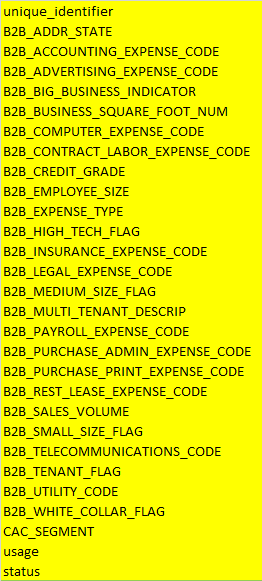

- **Column to drop:**
`"B2B_ADDR_ZIP5",
"B2B_ACCEPT_CREDIT_CARD_FLAG",
"B2B_AD_SIZE",
"B2B_BUSINESS_DESCRIP_FLAG",
"B2B_BUSINESS_GROW_FLAG",
"B2B_CALL_STATUS",
"B2B_CREDIT_FLAG",
"B2B_CREDIT_SCORE",
"B2B_CREDIT_YEAR",
"B2B_EMPLOYEE_DERVTN_FLAG",
"B2B_EMPLOYEE_NUM",
"B2B_FIRST_YEAR_CCYY",
"B2B_HIGH_INCOME_EXEC_FLAG",
"B2B_MULTI_EXEC_FLAG",
"B2B_NAICS_CODE",
"B2B_NAICS_CODE_DESCRIP",
"B2B_NAICS1",
"B2B_NAICS1_DESCRIP",
"B2B_NAICS2",
"B2B_NAICS2_DESCRIP",
"B2B_OFFICE_SUPPLY_EXPENSE_CODE",
"B2B_PACKAGE_EXPENSE_CODE",
"B2B_PAY_AT_PUMP_FLAG",
"B2B_POP_DENSITY",
"B2B_PRIMARY_SIC",
"B2B_PRIMARY_SIC_DESCRIP",
"B2B_PRIMARY_SIC_FLAG",
"B2B_PRIMARY_SITE_FLAG",
"B2B_SALES_VOLUME_ESTIM",
"B2B_SECONDARY_SIC_CODE1",
"B2B_SECONDARY_SIC_CODE2",
"B2B_SECONDARY_SIC_DESCRIP1",
"B2B_SECONDARY_SIC_DESCRIP2",
"B2B_SIC_CODE",
"B2B_SIC_DESCRIP",
"B2B_STATE_CODE",
"B2B_TRUE_FRNCHSE_FLAG",
"B2B_WEALTH_FLAG",
"B2B_WHITE_COLLAR_PRCNT",
"B2B_YEAR_SIC_ADD"`
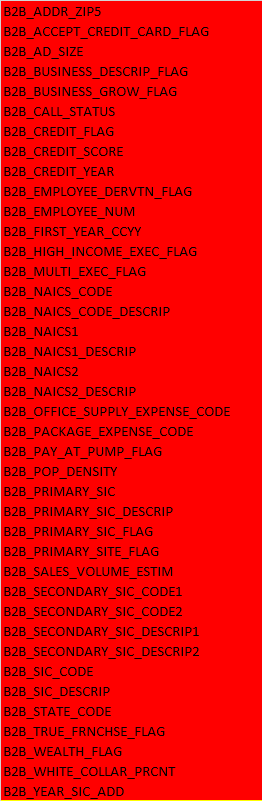

- **Column that in cosinderation:**
`"B2B_INDIVIDUAL_FLAG",
"B2B_NUM_TENANATS",
"B2B_PRODUCTION_DATE",`
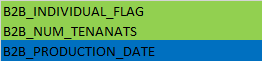

In [ ]:
independents = df[["unique_identifier", "B2B_ACCOUNTING_EXPENSE_CODE", 
                        "B2B_ADVERTISING_EXPENSE_CODE", "B2B_BIG_BUSINESS_INDICATOR", 
                        "B2B_BUSINESS_SQUARE_FOOT_NUM", "B2B_COMPUTER_EXPENSE_CODE", 
                        "B2B_CONTRACT_LABOR_EXPENSE_CODE", "B2B_CREDIT_GRADE", "B2B_EMPLOYEE_SIZE", 
                        "B2B_EXPENSE_TYPE", "B2B_HIGH_TECH_FLAG", "B2B_INSURANCE_EXPENSE_CODE", "B2B_LEGAL_EXPENSE_CODE"
                        , "B2B_MEDIUM_SIZE_FLAG", "B2B_MULTI_TENANT_DESCRIP", "B2B_PAYROLL_EXPENSE_CODE",
                        "B2B_PURCHASE_ADMIN_EXPENSE_CODE", "B2B_PURCHASE_PRINT_EXPENSE_CODE", 
                        "B2B_REST_LEASE_EXPENSE_CODE", "B2B_SALES_VOLUME", "B2B_SMALL_SIZE_FLAG", 
                        "B2B_TELECOMMUNICATIONS_CODE", "B2B_TENANT_FLAG", "B2B_UTILITY_CODE", "B2B_WHITE_COLLAR_FLAG", "usage"]]
pd.set_option('display.max_columns', None)
independents

From 103, we have 29 columns left (the cleaning leave us with..?)

In [ ]:
independents.info()

In [ ]:
#label encoding data

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

independents.iloc[:, 2:-2] = independents.iloc[:, 2:-2].apply(le.fit_transform)
independents

In [ ]:
independents.info()

In [ ]:
# Setting independent and target variables
X = independents.iloc[:,2:-2]
y = df["usage"]

**Since the target variable are `float`, we would set other categorical values to float as well**

In [ ]:
for i in X:
    X[i] = X[i].astype('float64')
X.info()

In [ ]:
y

In [ ]:
X.info()

In [ ]:
# Heat map showing correlation among attributes
sns.set (rc = {'figure.figsize':(15, 15)})
sns.heatmap(independents.iloc[:,1:-1].corr(),cmap='coolwarm',vmin=.5)
plt.show()

Split the data to train with **_test size_** = 30% , **_train size_** = 70% of the dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

---
## Multi-Linear Regression <a class="anchor" id="MultiLinearRegression"></a>

---
## Decision Trees <a class="anchor" id="DecisionTrees"></a>

https://towardsdatascience.com/decision-tree-ba64f977f7c3
https://www.kaggle.com/code/arpikr/decision-tree-regression-model
https://www.nbshare.io/notebook/312837011/Decision-Tree-Regression-With-Hyper-Parameter-Tuning-In-Python/

df_train_data = df[['unique_identifier','usage','status',
"B2B_EMPLOYEE_SIZE",
"B2B_BUSINESS_SQUARE_FOOT_NUM",
"B2B_BIG_BUSINESS_INDICATOR",
"B2B_SMALL_SIZE_FLAG",
"B2B_MEDIUM_SIZE_FLAG",
"B2B_HIGH_TECH_FLAG",
"B2B_TELECOMMUNICATIONS_CODE",
"B2B_UTILITY_CODE",
"B2B_COMPUTER_EXPENSE_CODE",
"B2B_PURCHASE_PRINT_EXPENSE_CODE",
"CAC_SEGMENT",
"B2B_WHITE_COLLAR_PRCNT"]]
df_train_data

unique_identifier	B2B_ADDR_ZIP5	B2B_ADDR_STATE	B2B_ACCEPT_CREDIT_CARD_FLAG	B2B_ACCOUNTING_EXPENSE_CODE	B2B_AD_SIZE	B2B_ADVERTISING_EXPENSE_CODE	B2B_BIG_BUSINESS_INDICATOR	B2B_BUSINESS_DESCRIP_FLAG	B2B_BUSINESS_GROW_FLAG	B2B_BUSINESS_SQUARE_FOOT_NUM	B2B_CALL_STATUS	B2B_COMPUTER_EXPENSE_CODE	B2B_CONTRACT_LABOR_EXPENSE_CODE	B2B_CREDIT_FLAG	B2B_CREDIT_GRADE	B2B_CREDIT_SCORE	B2B_CREDIT_YEAR	B2B_EMPLOYEE_DERVTN_FLAG	B2B_EMPLOYEE_NUM	B2B_EMPLOYEE_SIZE	B2B_EXPENSE_TYPE	B2B_FIRST_YEAR_CCYY	B2B_HIGH_INCOME_EXEC_FLAG	B2B_HIGH_TECH_FLAG	B2B_INDIVIDUAL_FLAG	B2B_INSURANCE_EXPENSE_CODE	B2B_LEGAL_EXPENSE_CODE	B2B_MEDIUM_SIZE_FLAG	B2B_MULTI_EXEC_FLAG	B2B_MULTI_TENANT_DESCRIP	B2B_NAICS_CODE	B2B_NAICS_CODE_DESCRIP	B2B_NAICS1	B2B_NAICS1_DESCRIP	B2B_NAICS2	B2B_NAICS2_DESCRIP	B2B_NUM_TENANATS	B2B_OFFICE_SUPPLY_EXPENSE_CODE	B2B_PACKAGE_EXPENSE_CODE	B2B_PAY_AT_PUMP_FLAG	B2B_PAYROLL_EXPENSE_CODE	B2B_POP_DENSITY	B2B_PRIMARY_SIC	B2B_PRIMARY_SIC_DESCRIP	B2B_PRIMARY_SIC_FLAG	B2B_PRIMARY_SITE_FLAG	B2B_PRODUCTION_DATE	B2B_PURCHASE_ADMIN_EXPENSE_CODE	B2B_PURCHASE_PRINT_EXPENSE_CODE	B2B_REST_LEASE_EXPENSE_CODE	B2B_SALES_VOLUME	B2B_SALES_VOLUME_ESTIM	B2B_SECONDARY_SIC_CODE1	B2B_SECONDARY_SIC_CODE2	B2B_SECONDARY_SIC_DESCRIP1	B2B_SECONDARY_SIC_DESCRIP2	B2B_SIC_CODE	B2B_SIC_DESCRIP	B2B_SMALL_SIZE_FLAG	B2B_STATE_CODE	B2B_TELECOMMUNICATIONS_CODE	B2B_TENANT_FLAG	B2B_TRUE_FRNCHSE_FLAG	B2B_UTILITY_CODE	B2B_WEALTH_FLAG	B2B_WHITE_COLLAR_FLAG	B2B_WHITE_COLLAR_PRCNT	B2B_YEAR_SIC_ADD	CAC_SEGMENT	usage	status


In [ ]:
#sns.set(rc={'figure.figsize':(35,16)}) #35,16
#sns.pairplot(independents,palette='Set1')

The main difference between a decision tree classifier and a decision tree regressor in scikit-learn is the type of output they produce.

A decision tree classifier is used when the target variable is categorical or qualitative in nature, meaning that it takes on discrete values or categories. The classifier will build a tree-like model that partitions the data into smaller and smaller subsets based on the values of the independent variables, and assigns a class label to each subset based on the majority class of the instances in that subset. The output of the classifier is a discrete class label or category for each instance in the data.

On the other hand, a decision tree regressor is used when the target variable is continuous or quantitative in nature, meaning that it takes on a range of values. The regressor will build a tree-like model that partitions the data into smaller and smaller subsets based on the values of the independent variables, and assigns a numeric value to each subset based on the mean or median value of the instances in that subset. The output of the regressor is a continuous value or range of values for each instance in the data.

In summary, the decision tree classifier and decision tree regressor differ in the type of output they produce - discrete class labels for the classifier, and continuous values for the regressor - and the type of target variable they are designed to hand

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [ ]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train,y_train)

In [ ]:
dtree.score(X_train,y_train)

In [ ]:
dtree.score(X_test,y_test)

evaluate the decision tree

In [ ]:
y_pred= dtree.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Calculate evaluation metrics using predicted values and actual values
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Visualize the predicted values and actual values using a scatter plot
sns.scatterplot(x=y_test, y=y_pred)

# Display the evaluation metrics
print("Mean squared error: {:.2f}".format(mse))
print("Mean absolute error: {:.2f}".format(mae))
print("R-squared: {:.2f}".format(r2))

Visualize the evaluation of the model

In [ ]:
# Create a scatter plot of the predicted values versus the actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs. Predicted Values')
plt.show()

# Create a residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Calculate the R-squared value
r_squared = r2_score(y_test, y_pred)
print('R-squared:', r_squared)

In [ ]:
dtree.feature_importances_
pd.Series(dtree.feature_importances_,index=X_train.columns).sort_values(ascending=False)

In [ ]:
sns.distplot(y_test-y_pred)

In [ ]:
#import sys
#!{sys.executable} -m pip install pydot
#!{sys.executable} -m pip install graphviz

from IPython.display import Image
import six
import graphviz
#from sklearn.externals.six import StringIO   
from sklearn.tree import export_graphviz
import pydot

features = list(independents.columns[:])
features

In [ ]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz

#import sys
#!{sys.executable} -m pip install pydotplus

import pydotplus
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
dot_data = StringIO()

export_graphviz(dtree,filled=True,rounded=True, feature_names=X_train.columns, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

### Hyperparameter tuning

In [ ]:
# Hyper parameters range intialization for tuning 

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [ ]:
# calculating different regression metrics
from sklearn.model_selection import GridSearchCV
tuning_model=GridSearchCV(dtree,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

# function for calculating how much time take for hyperparameter tuning

def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        print(thour,":",tmin,':',round(tsec,2))

In [ ]:
%%capture  
#(don't even run it, took me hours!!)
from datetime import datetime

start_time=timer(None)

#tuning_model.fit(X,y)

timer(start_time)

In [ ]:
# best hyperparameters 
tuning_model.best_params_

#{'max_depth': 5,
# 'max_features': 'auto',
# 'max_leaf_nodes': None,
# 'min_samples_leaf': 1,
# 'min_weight_fraction_leaf': 0.1,
# 'splitter': 'best'}

In [ ]:
# best model score
tuning_model.best_score_

In [ ]:
dtree_tuned= DecisionTreeRegressor(max_depth=12,max_features='auto',max_leaf_nodes=20,min_samples_leaf=5,min_weight_fraction_leaf=0.1,splitter='random')

In [ ]:
# fitting model
dtree_tuned.fit(X_train,y_train)

In [ ]:
# prediction 
y_tuned_pred=dtree_tuned.predict(X_test)

In [ ]:
# Calculate evaluation metrics using predicted values and actual values
mse = mean_squared_error(y_test, y_tuned_pred)
mae = mean_absolute_error(y_test, y_tuned_pred)
r2 = r2_score(y_test, y_tuned_pred)

# Visualize the predicted values and actual values using a scatter plot
sns.scatterplot(x=y_test, y=y_tuned_pred)

# Display the evaluation metrics
print("Mean squared error: {:.2f}".format(mse))
print("Mean absolute error: {:.2f}".format(mae))
print("R-squared: {:.2f}".format(r2))

In [ ]:
# Create a scatter plot of the predicted values versus the actual values
plt.scatter(y_test, y_tuned_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs. Predicted Values')
plt.show()

# Create a residual plot
residuals = y_test - y_tuned_pred
plt.scatter(y_tuned_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Calculate the R-squared value
r_squared = r2_score(y_test, y_tuned_pred)
print('R-squared:', r_squared)

In [ ]:
sns.distplot(y_test-y_tuned_pred)

In [ ]:
dtree_tuned.feature_importances_
feat_importances= pd.Series(dtree_tuned.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feat_importances

In [ ]:
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

A confusion matrix is typically used after training a classification model, including decision trees, to evaluate the performance of the model on a validation or test set. The confusion matrix allows you to see the number of true positives, false positives, true negatives, and false negatives generated by the model, which can help you understand how well the model is performing and identify any areas for improvement.

By contrast, decision trees are a type of supervised learning algorithm that can be used for both classification and regression tasks. Decision trees are used to create a model that predicts the value of a target variable based on several input variables or features. The decision tree algorithm works by recursively splitting the data based on the most informative features, with the goal of creating subsets of the data that are more homogeneous with respect to the target variable.

In [ ]:
#from sklearn.metrics import classification_report,confusion_matrix
#display(confusion_matrix(y_test,predictions))

plot the confusion matrix

In [ ]:
#from sklearn.metrics import ConfusionMatrixDisplay

#cm = confusion_matrix(y_test,predictions)
#cmd = ConfusionMatrixDisplay(cm, display_labels= df_train_data['usage'])
#cmd.plot()

In [ ]:
#display(classification_report(y_test,predictions))

visualize the tree

In [ ]:
#import sys
#!{sys.executable} -m pip install pydot
#!{sys.executable} -m pip install graphviz

from IPython.display import Image
import six
import graphviz
#from sklearn.externals.six import StringIO   
from sklearn.tree import export_graphviz
import pydot

features = list(independents.columns[:])
features

In [ ]:
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
dot_data = StringIO()

export_graphviz(dtree_tuned,filled=True,rounded=True, feature_names=X_train.columns, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

In [ ]:
# Square foot num _ Employee size , ulti code, employ num

### Run on most important independent variables based on MCA

In [ ]:
# Setting independent and target variables
X_MCA = independents[['B2B_BIG_BUSINESS_INDICATOR', 'B2B_ADVERTISING_EXPENSE_CODE', 'B2B_ACCOUNTING_EXPENSE_CODE', 'B2B_BUSINESS_SQUARE_FOOT_NUM', 'B2B_COMPUTER_EXPENSE_CODE']]
y = df["usage"]

In [ ]:
X_MCA.info()

In [ ]:
X_train_MCA, X_test_MCA, y_train_MCA, y_test_MCA = train_test_split(X_MCA, y, test_size=0.30)

In [ ]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train_MCA,y_train_MCA)

In [ ]:
y_pred_MCA= dtree.predict(X_test_MCA)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Calculate evaluation metrics using predicted values and actual values
mse = mean_squared_error(y_test_MCA, y_pred_MCA)
mae = mean_absolute_error(y_test_MCA, y_pred_MCA)
r2 = r2_score(y_test_MCA, y_pred_MCA)

# Visualize the predicted values and actual values using a scatter plot
sns.scatterplot(x=y_test_MCA, y=y_pred_MCA)

# Display the evaluation metrics
print("Mean squared error: {:.2f}".format(mse))
print("Mean absolute error: {:.2f}".format(mae))
print("R-squared: {:.2f}".format(r2))

In [ ]:
# Create a scatter plot of the predicted values versus the actual values
plt.scatter(y_test_MCA, y_pred_MCA)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs. Predicted Values')
plt.show()

# Create a residual plot
residuals_MCA = y_test_MCA - y_pred_MCA
plt.scatter(y_pred_MCA, residuals_MCA)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Calculate the R-squared value
r_squared = r2_score(y_test_MCA, y_pred_MCA)
print('R-squared:', r_squared)

In [ ]:
dtree.feature_importances_
pd.Series(dtree.feature_importances_,index=X_train_MCA.columns).sort_values(ascending=False)

In [ ]:
%%capture  
#(don't even run it, took me hours!!)
from datetime import datetime

start_time=timer(None)

tuning_model.fit(X_MCA,y)

timer(start_time)

In [ ]:
# best hyperparameters 
tuning_model.best_params_

In [ ]:
# best model score
tuning_model.best_score_

In [ ]:
dtree_tuned_MCA= DecisionTreeRegressor(max_depth=7,max_features='log2',max_leaf_nodes=50,min_samples_leaf=5,min_weight_fraction_leaf=0.1,splitter='best')

In [ ]:
# fitting model
dtree_tuned_MCA.fit(X_train_MCA,y_train_MCA)

In [ ]:
# prediction 
y_tuned_pred_MCA=dtree_tuned_MCA.predict(X_test_MCA)

In [ ]:
# Calculate evaluation metrics using predicted values and actual values
mse = mean_squared_error(y_test_MCA, y_tuned_pred_MCA)
mae = mean_absolute_error(y_test_MCA, y_tuned_pred_MCA)
r2 = r2_score(y_test_MCA, y_tuned_pred_MCA)

# Display the evaluation metrics
print("Mean squared error: {:.2f}".format(mse))
print("Mean absolute error: {:.2f}".format(mae))
print("R-squared: {:.2f}".format(r2))

In [ ]:
dtree_tuned_MCA.feature_importances_
feat_importances = pd.Series(dtree_tuned_MCA.feature_importances_,index=X_train_MCA.columns).sort_values(ascending=False)

In [ ]:
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [ ]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz

#import sys
#!{sys.executable} -m pip install pydotplus

import pydotplus
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
dot_data = StringIO()

export_graphviz(dtree_tuned_MCA,filled=True,rounded=True, feature_names=X_train_MCA.columns, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

---
## Random Forests <a class="anchor" id="RandomForests"></a>

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100,max_depth=12,max_features='auto',max_leaf_nodes=20,min_samples_leaf=5,min_weight_fraction_leaf=0.1,criterion="squared_error")
#{'max_depth': 5,
# 'max_features': 'auto',
# 'max_leaf_nodes': None,
# 'min_samples_leaf': 1,
# 'min_weight_fraction_leaf': 0.1,
# 'splitter': 'best'}
rfr.fit(X_train, y_train)

In [ ]:
y_pred = rfr.predict(X_test)

In [ ]:
rfr.score(X_train,y_train)

In [ ]:
rfr.score(X_test,y_test)

In [ ]:
# Calculate evaluation metrics using predicted values and actual values
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Visualize the predicted values and actual values using a scatter plot
sns.scatterplot(x=y_test, y=y_pred)

# Display the evaluation metrics
print("Mean squared error: {:.2f}".format(mse))
print("Mean absolute error: {:.2f}".format(mae))
print("R-squared: {:.2f}".format(r2))

In [ ]:
parameters={"criterion": ["squared_error", "absolute_error", "friedman_mse", "poisson"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [ ]:
tuning_model=GridSearchCV(rfr,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [ ]:
%%capture

start_time=timer(None)

#tuning_model.fit(X,y)

timer(start_time)

In [ ]:
tuning_model.best_params_

In [ ]:
tuning_model.best_score_

In [ ]:
rfr_tuned = RandomForestRegressor(n_estimators=100,)
rfr_tuned.fit(X_train,y_train)
# prediction 
y_tuned_pred=rfr_tuned.predict(X_test)

In [ ]:
# Calculate evaluation metrics using predicted values and actual values
mse = mean_squared_error(y_test, y_tuned_pred)
mae = mean_absolute_error(y_test, y_tuned_pred)
r2 = r2_score(y_test, y_tuned_pred)

# Visualize the predicted values and actual values using a scatter plot
sns.scatterplot(x=y_test, y=y_tuned_pred)

# Display the evaluation metrics
print("Mean squared error: {:.2f}".format(mse))
print("Mean absolute error: {:.2f}".format(mae))
print("R-squared: {:.2f}".format(r2))

In [ ]:
rfr.feature_importances_
feat_importances= pd.Series(rfr.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feat_importances

In [ ]:
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz

#import sys
#!{sys.executable} -m pip install pydotplus

import pydotplus
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
dot_data = StringIO()

export_graphviz(rfr.estimators_[0],filled=True,rounded=True, feature_names=X_train.columns ,out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

## Naive Bayers <a class="anchor" id="NaiveBayers"></a>

In [ ]:
y_new_status = df["status"]
y_new_status

In [ ]:
y_new_status.unique()

In [ ]:
print(X.shape, y_new_status.shape)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_labels = le.fit_transform(y_new_status)
#print(numerical_labels)
print(le.inverse_transform(y_labels))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_labels, test_size=0.30)

In [ ]:
y_train

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: {:.2%}".format(accuracy))

In [ ]:
# Predict
print(le.inverse_transform(gnb.predict(X_test[1:2])))

#### Dependent

In [ ]:
X_dependent = df[["usage"]]
X_dependent

In [ ]:
y_labels.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_dependent, y_labels, test_size=0.30)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: {:.2%}".format(accuracy))

In [ ]:
# Predict
print(le.inverse_transform(gnb.predict(X_test[1:2])))

---
## K-Nearest Neighbor (K-NN) <a class="anchor" id="KNN"></a>

In [ ]:
df_knn = pd.read_csv("Clean Data/prep_dataset_20230425.csv", low_memory=False)

In [ ]:
df_knn.corr()

In [ ]:
df_knn.columns

In [ ]:
# Setting independent variables
X_knn = df_knn.iloc[:,3:].copy()


In [ ]:
# Setting dependent variables
y_knn = df_knn['usage_range'].copy()


In [ ]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.3)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(X_train_knn)
X_train_knn = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(X_test_knn)
X_test_knn = pd.DataFrame(x_test_scaled)

In [ ]:
rmse_val = [] #to store rmse values for different k
for K in range(10,20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train_knn, y_train_knn)  #fit the model
    pred=model.predict(X_test_knn) #make prediction on test set
    error = sqrt(mean_squared_error(y_test_knn,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
model = neighbors.KNeighborsRegressor(n_neighbors = 19)
model.fit(X_train_knn, y_train_knn)  #fit the model
pred = model.predict(X_test_knn) #make prediction on test set
error = sqrt(mean_squared_error(y_test_knn,pred)) #calculate rmse
#rmse_val.append(error) #store rmse values
print('MSE value for is:', error)